In [13]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # or the full path to the "project" directory
from gpbr.collocation import collocation_points_2d, CollocationData2D
from gpbr.boundary import StarlikeCurve, starlike_circle_base, starlike_curve
import cloudpickle

import numpy as np
import matplotlib.pyplot as plt

In [14]:
## Plot
def plot_2d(G1: StarlikeCurve, G2: StarlikeCurve, artG1: StarlikeCurve, artG2: StarlikeCurve):
    fig_plot, ax_plot = plt.subplots()
    ax_plot.plot(G1.x, G1.y, 'b--')
    ax_plot.plot(G2.x, G2.y, 'r--')
    ax_plot.plot(artG1.x, artG1.y, 'bo')
    ax_plot.plot(artG2.x, artG2.y, 'ro')

    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    plt.close()


In [15]:
N=16

In [16]:
coll_2d_closed = collocation_points_2d(N, startpoint=True)
point_circle_closed = starlike_circle_base(coll_2d_closed)

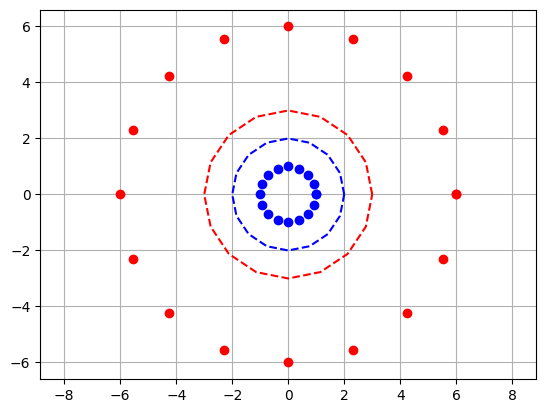

In [17]:
g1_r_values = np.ones(coll_2d_closed.n)*2
Gamma1 = starlike_curve(g1_r_values, point_circle_closed)

g2_r_values = np.ones(coll_2d_closed.n)*3
Gamma2 = starlike_curve(g2_r_values, point_circle_closed)


eta1 = 0.5
artGamma1 = starlike_curve(g1_r_values*eta1, point_circle_closed)

eta2 = 2
artGamma2 = starlike_curve(g2_r_values*eta2, point_circle_closed)

plot_2d(Gamma1, Gamma2, artGamma1, artGamma2)

In [18]:
def plot_3d(Ntheta, Nphi, exact_func, approx_func, save_filename = None):
    thetas_plot = np.linspace(0,np.pi,Ntheta)
    phis_plot = np.linspace(0,2*np.pi,Nphi)

    x = np.outer(np.cos(phis_plot), np.sin(thetas_plot))
    y = np.outer(np.sin(phis_plot), np.sin(thetas_plot))
    z = np.outer(np.ones(np.size(phis_plot)), np.cos(thetas_plot))

    thetas_mesh, phis_mesh = np.meshgrid(thetas_plot,phis_plot)

    r_approx_vals = approx_func(thetas_mesh,thetas_mesh)
    r_exact_vals = exact_func(thetas_plot,phis_plot)


    fig_plot, ax_plot = plt.subplots(subplot_kw={"projection": "3d"})

    surf_approx = ax_plot.plot_wireframe(r_approx_vals*x,r_approx_vals*y, r_approx_vals*z,color='royalblue',linewidth=0.7)
    surf_exact = ax_plot.plot_wireframe(r_exact_vals*x,r_exact_vals*y,r_exact_vals*z,color='lime',linewidth=0.7)

    ax_plot.set_xlim3d([-3, 3])
    ax_plot.set_ylim3d([-3, 3])
    ax_plot.set_zlim3d([-3, 3])
    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig_plot.canvas.draw()
    if save_filename:
        fig_plot.savefig(save_filename, dpi=400, bbox_inches='tight')
    plt.close()

In [1]:
from gpbr.collocation import collocation_points_3d, CollocationData3D, linspace_points_3d
from gpbr.boundary import StarlikeSurface, starlike_sphere_base, starlike_surface


import numpy as np
import matplotlib.pyplot as plt

In [7]:
Ntheta = 32
Nphi = 64

In [8]:
def r(theta, phi):
    # Example: radial distance as a function of theta and phi
    return 1 + 0.5 * np.sin(2*theta) * np.cos(phi)  # You caan modify this as needed

In [9]:
coll_3d = collocation_points_3d(Ntheta, Nphi)
r_grid = r(coll_3d.theta_grid, coll_3d.phi_grid)

In [10]:
surface = starlike_surface(r_grid, coll_3d)

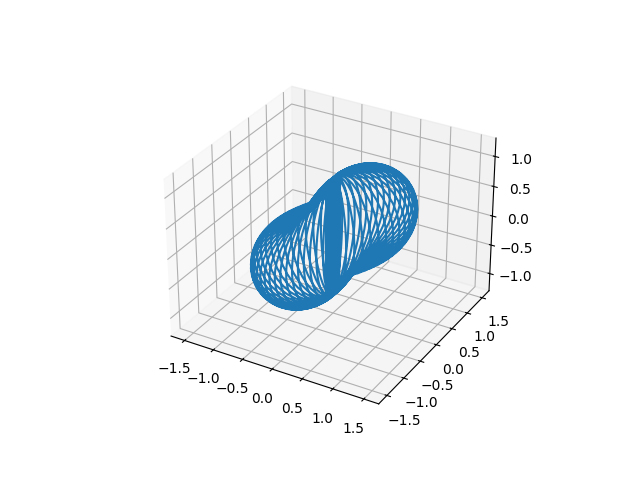

In [12]:
%matplotlib widget
fig_plot, ax_plot = plt.subplots(subplot_kw={"projection": "3d"})
# ax_plot.plot(surface.x, surface.y, surface.z ,'bo')
ax_plot.plot(surface.x, surface.y, surface.z)

ax_plot.set_xlim3d([-3, 3])
ax_plot.set_ylim3d([-3, 3])
ax_plot.set_zlim3d([-3, 3])
ax_plot.axis('equal')
plt.grid()
plt.show()

In [11]:
sphere.x.shape

(72,)

In [70]:
thetas = np.linspace(0, np.pi, Ntheta)
phis = np.linspace(0, 2*np.pi, Nphi)


In [71]:
# Create a meshgrid of thetas and phis
theta_grid, phi_grid = np.meshgrid(thetas, phis)

# Use numpy's vectorized operations to calculate x, y, z
xs = (np.sin(theta_grid) * np.cos(phi_grid)).ravel()
ys = (np.sin(theta_grid) * np.sin(phi_grid)).ravel()
zs = (np.cos(theta_grid)).ravel()

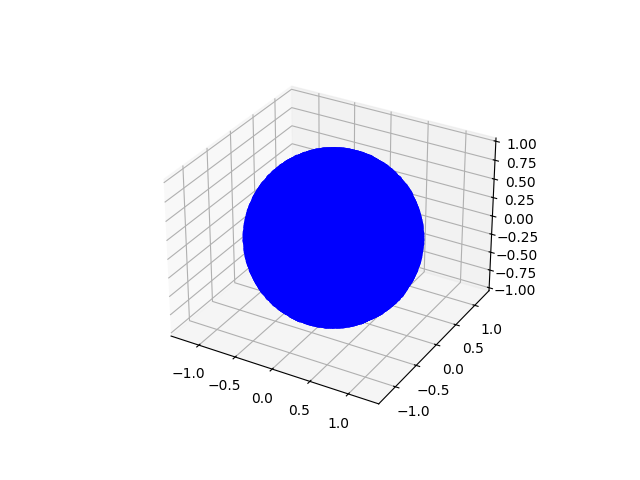

In [72]:
%matplotlib widget
fig_plot, ax_plot = plt.subplots(subplot_kw={"projection": "3d"})
ax_plot.plot(xs, ys, zs ,'bo')

ax_plot.set_xlim3d([-3, 3])
ax_plot.set_ylim3d([-3, 3])
ax_plot.set_zlim3d([-3, 3])
ax_plot.axis('equal')
plt.grid()
plt.show()

# plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
# fig_plot.canvas.draw()
# if save_filename:
#     fig_plot.savefig(save_filename, dpi=400, bbox_inches='tight')
# plt.close()

In [42]:
zs.shape

(12, 6)

In [30]:
def Gamma(theta, phi):
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    return x, y ,z

In [31]:
thetas = np.linspace(0, np.pi, Ntheta)
phis = np.linspace(0, 2*np.pi, Nphi)


In [32]:
xs = []
ys = []
zs = []

In [33]:
for t in thetas:
    for p in phis:
        x, y, z = Gamma(t, p)
        xs.append(x)
        ys.append(y)
        zs.append(z)


In [34]:
xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)

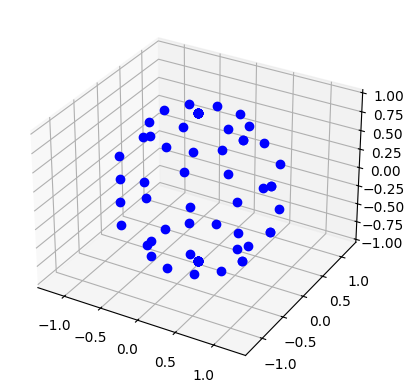

In [35]:
fig_plot, ax_plot = plt.subplots(subplot_kw={"projection": "3d"})
ax_plot.plot(xs, ys, zs ,'bo')

ax_plot.set_xlim3d([-3, 3])
ax_plot.set_ylim3d([-3, 3])
ax_plot.set_zlim3d([-3, 3])
ax_plot.axis('equal')
plt.grid()
plt.show()

# plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
# fig_plot.canvas.draw()
# if save_filename:
#     fig_plot.savefig(save_filename, dpi=400, bbox_inches='tight')
plt.close()

In [3]:
Ntheta = 8
Nphi = 16

In [4]:
coll_3d = collocation_points_3d(Ntheta, Nphi)

In [5]:
coll_3d

CollocationData3D(n_theta=8, n_phi=16, theta=array([0.34906585, 0.6981317 , 1.04719755, 1.3962634 , 1.74532925,
       2.0943951 , 2.44346095, 2.7925268 ]), phi=array([0.39269908, 0.78539816, 1.17809725, 1.57079633, 1.96349541,
       2.35619449, 2.74889357, 3.14159265, 3.53429174, 3.92699082,
       4.3196899 , 4.71238898, 5.10508806, 5.49778714, 5.89048623,
       6.28318531]), mesh=[array([[0.34906585, 0.6981317 , 1.04719755, 1.3962634 , 1.74532925,
        2.0943951 , 2.44346095, 2.7925268 ],
       [0.34906585, 0.6981317 , 1.04719755, 1.3962634 , 1.74532925,
        2.0943951 , 2.44346095, 2.7925268 ],
       [0.34906585, 0.6981317 , 1.04719755, 1.3962634 , 1.74532925,
        2.0943951 , 2.44346095, 2.7925268 ],
       [0.34906585, 0.6981317 , 1.04719755, 1.3962634 , 1.74532925,
        2.0943951 , 2.44346095, 2.7925268 ],
       [0.34906585, 0.6981317 , 1.04719755, 1.3962634 , 1.74532925,
        2.0943951 , 2.44346095, 2.7925268 ],
       [0.34906585, 0.6981317 , 1.04719755, 1.

In [6]:
point_sphere = starlike_sphere_base(coll_3d)

ValueError: operands could not be broadcast together with shapes (8,) (16,) 

In [ ]:
def plot_3d(G1: StarlikeSurface):

    fig_plot, ax_plot = plt.subplots(subplot_kw={"projection": "3d"})
    ax_plot.plot_wireframe(G1.x, G1.y, G1.z,color='royalblue',linewidth=0.7)

    ax_plot.set_xlim3d([-3, 3])
    ax_plot.set_ylim3d([-3, 3])
    ax_plot.set_zlim3d([-3, 3])
    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    
    # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    # fig_plot.canvas.draw()
    # if save_filename:
    #     fig_plot.savefig(save_filename, dpi=400, bbox_inches='tight')
    plt.close()

In [ ]:
coll_3d = collocation_points_3d(Ntheta, Nphi)
g1_r_values = np.ones((coll_3d.n_theta,coll_3d.n_phi))
g1_r_values = np.ones((coll_3d.n_theta,coll_3d.n_phi))*2

In [ ]:
sphere = starlike_sphere_base(coll_3d)
Gamma1 = starlike_surface(g1_r_values, coll_3d)
Gamma2 = starlike_surface(coll_3d)

In [18]:
coll_3d_closed = linspace_points_3d(Ntheta, Nphi)
coll_3d = collocation_points_3d(Ntheta, Nphi)

In [19]:
coll_3d_closed
coll_3d

CollocationData3D(n_theta=8, n_phi=16, theta=array([0.34906585, 0.6981317 , 1.04719755, 1.3962634 , 1.74532925,
       2.0943951 , 2.44346095, 2.7925268 ]), phi=array([0.39269908, 0.78539816, 1.17809725, 1.57079633, 1.96349541,
       2.35619449, 2.74889357, 3.14159265, 3.53429174, 3.92699082,
       4.3196899 , 4.71238898, 5.10508806, 5.49778714, 5.89048623,
       6.28318531]))

In [ ]:
g1_r_values = np.ones(coll_3d.n)*2
g2_r_values = np.ones(coll_3d.n)*2


In [12]:

sphere_mesh = starlike_sphere_mesh_base(coll_3d_closed)
sphere_mesh

StarlikeSurface(collocation=CollocationData3D(n_theta=16, n_phi=32, theta=array([0.        , 0.20943951, 0.41887902, 0.62831853, 0.83775804,
       1.04719755, 1.25663706, 1.46607657, 1.67551608, 1.88495559,
       2.0943951 , 2.30383461, 2.51327412, 2.72271363, 2.93215314,
       3.14159265]), phi=array([0.        , 0.2026834 , 0.40536679, 0.60805019, 0.81073359,
       1.01341699, 1.21610038, 1.41878378, 1.62146718, 1.82415057,
       2.02683397, 2.22951737, 2.43220076, 2.63488416, 2.83756756,
       3.04025096, 3.24293435, 3.44561775, 3.64830115, 3.85098454,
       4.05366794, 4.25635134, 4.45903473, 4.66171813, 4.86440153,
       5.06708493, 5.26976832, 5.47245172, 5.67513512, 5.87781851,
       6.08050191, 6.28318531])), x=array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -

In [13]:
def plot_3d(G1: StarlikeSurface):

    fig_plot, ax_plot = plt.subplots(subplot_kw={"projection": "3d"})
    ax_plot.plot_wireframe(G1.x, G1.y, G1.z,color='royalblue',linewidth=0.7)

    ax_plot.set_xlim3d([-3, 3])
    ax_plot.set_ylim3d([-3, 3])
    ax_plot.set_zlim3d([-3, 3])
    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    
    # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    # fig_plot.canvas.draw()
    # if save_filename:
    #     fig_plot.savefig(save_filename, dpi=400, bbox_inches='tight')
    plt.close()

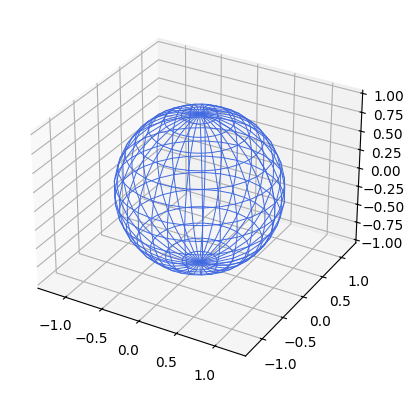

In [14]:
plot_3d(sphere_mesh)

In [ ]:
import operator
import math

import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import gp


import matplotlib.pyplot as plt

## Functions used in DEAP
def protectedDiv(left, right):
    if abs(right) < 1e-5:
        return 1.0
    return operator.truediv(left, right)

def protectedSqrt(val):
    return math.sqrt(abs(val))


def pow2(val):
    return math.pow(val,2)

def pow3(val):
    return math.pow(val,3)

def pow4(val):
    return math.pow(val,4)

def pow5(val):
    return math.pow(val,5)

def lf(x):
    return 1 / (1 + math.exp(-x))


def init_toolbox(dim_2d = True):
    if dim_2d:
        pset = gp.PrimitiveSet("MAIN", 1) # in 2d radial function has only one parameter
    else:
        pset = gp.PrimitiveSet("MAIN", 2) # in 3d radial function has two parameters (phi, theta)

    # some binary operators
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(protectedDiv, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(pow2, 1)


    # some unary operators
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)
    pset.addPrimitive(protectedSqrt, 1)
    pset.addPrimitive(lf, 1)


    # some useful constants
    pset.addTerminal(np.pi,name='pi')
    pset.addTerminal(np.e,name='e')
    # pset.addEphemeralConstant("randUniform", lambda: random.uniform(-10, 10))

    # rename arguments
    if dim_2d:
        pset.renameArguments(ARG0='t')
    else:
        pset.renameArguments(ARG0='theta')
        pset.renameArguments(ARG1='phi')
    
    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=4)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    return toolbox


## Plot
def plot_2d(N, exact_func, approx_func, save_filename = None):
    thetas_plot = np.linspace(0,2*np.pi,N)
    fig_plot, ax_plot = plt.subplots()
    x = np.cos(thetas_plot)
    y = np.sin(thetas_plot)

    r_approx_vals = approx_func(thetas_plot)
    curve_approx = ax_plot.plot(r_approx_vals*x, r_approx_vals*y, 'b--',linewidth=1.5)

    r_exact_vals = exact_func(thetas_plot)
    curve_exact = ax_plot.plot(r_exact_vals*x, r_exact_vals*y, 'g-',linewidth=1.5)

    ax_plot.axis('equal')
    # ax_plot.set_xticks(np.arange(-3, 3))
    # ax_plot.set_yticks(np.arange(-3., 3))
    plt.grid()
    plt.show()
    if save_filename:
        fig_plot.savefig(save_filename)
    plt.close()

def plot_3d(Ntheta, Nphi, exact_func, approx_func, save_filename = None):
    thetas_plot = np.linspace(0,np.pi,Ntheta)
    phis_plot = np.linspace(0,2*np.pi,Nphi)

    x = np.outer(np.cos(phis_plot), np.sin(thetas_plot))
    y = np.outer(np.sin(phis_plot), np.sin(thetas_plot))
    z = np.outer(np.ones(np.size(phis_plot)), np.cos(thetas_plot))

    thetas_mesh, phis_mesh = np.meshgrid(thetas_plot,phis_plot)

    r_approx_vals = approx_func(thetas_mesh,thetas_mesh)
    r_exact_vals = exact_func(thetas_plot,phis_plot)


    fig_plot, ax_plot = plt.subplots(subplot_kw={"projection": "3d"})

    surf_approx = ax_plot.plot_wireframe(r_approx_vals*x,r_approx_vals*y, r_approx_vals*z,color='royalblue',linewidth=0.7)
    surf_exact = ax_plot.plot_wireframe(r_exact_vals*x,r_exact_vals*y,r_exact_vals*z,color='lime',linewidth=0.7)

    ax_plot.set_xlim3d([-3, 3])
    ax_plot.set_ylim3d([-3, 3])
    ax_plot.set_zlim3d([-3, 3])
    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig_plot.canvas.draw()
    if save_filename:
        fig_plot.savefig(save_filename, dpi=400, bbox_inches='tight')
    plt.close()

def main():
    # Init deap
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree)

    ## Render 2D
    N = 256
    # # Example 1
    # exact_2d = lambda t: (1.9-1.5*math.sin(math.sin(t+2)*(math.cos(t+1.5)**2)))/(3-math.cos(t)**2)
    # solutions_noise = {
    #     '0': 'cos(protectedSqrt(lf(mul(pow2(-1.774041943978732), sin(add(add(t, protectedSqrt(pow2(sub(5.713744407666663, pi)))), sin(mul(pow2(-1.774041943978732), sin(add(add(sin(add(add(add(t, -9.918727275152781), sin(6.1854856339980415)), sin(6.1854856339980415))), sin(protectedDiv(sub(add(e, pow2(pi)), pi), protectedDiv(pi, pi)))), sin(6.1854856339980415)))))))))))',
    #     '2': 'cos(sin(add(sin(sin(sin(sin(add(e, t))))), sub(2.611746775592728, add(mul(pow2(pi), pi), sub(add(pi, t), pi)))))) ',
    #     '5': 'cos(sin(sin(add(mul(add(pi, pi), sin(6.190186183109937)), sin(sin(cos(add(pow2(pi), add(sub(mul(protectedDiv(pow2(-3.4864652149823483), sub(e, e)), -1.437366463499254), t), sin(sub(3.495315825144573, pow2(protectedSqrt(t))))))))))))) '
    # }
    # Example 2
    exact_2d = lambda t: 1-(math.cos(t+2*math.sin(t))**2)/2
    solutions_noise = {
        '0': 'lf(add(cos(pow2(pow2(sub(add(protectedSqrt(e), cos(t)), add(protectedDiv(sub(cos(t), sub(pi, 7.319875468842081)), protectedSqrt(pow2(pi))), lf(mul(protectedSqrt(e), 2.2420907020438374))))))), cos(add(pow2(sub(pi, t)), cos(protectedSqrt(pi))))))',
        '2': 'protectedSqrt(protectedDiv(add(pi, cos(sub(mul(add(e, pow2(mul(sin(sub(protectedSqrt(protectedSqrt(add(add(pi, e), lf(8.963627045235178)))), cos(t))), sub(pi, t)))), sin(t)), pi))), -7.019868652984229)) ',
        '5': 'lf(pow2(sin(add(t, t))))'
    }

    exact_2d = np.vectorize(exact_2d)


    toolbox = init_toolbox(dim_2d=True)
    for noise, ind in solutions_noise.items():
        plot_2d(N=N,
                exact_func=exact_2d,
                approx_func=np.vectorize(toolbox.compile(expr=ind)),
                save_filename=f"ex_2d_noise_{noise}.pdf"
                )

    # ## Render 3D
    # Ntheta, Nphi = 64, 64
    # # Example 1
    # exact_3d = lambda theta, phi: 2 +  math.sqrt(4.25 + 3*math.cos(3*theta))
    # # solutions_noise = {
    # #     '0': 'add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(mul(add(mul(pow2(2.100506676836387), lf(protectedDiv(protectedDiv(pi, phi), mul(4.05784588738986, phi)))), mul(sub(1.0, lf(protectedDiv(protectedDiv(pi, phi), mul(phi, pow2(protectedSqrt(phi)))))), add(mul(protectedSqrt(e), lf(protectedSqrt(protectedDiv(pi, phi)))), mul(sub(1.0, lf(protectedDiv(protectedDiv(pi, phi), mul(add(cos(e), sin(pi)), e)))), pow2(2.100506676836387))))), lf(add(sin(lf(theta)), cos(pow2(phi))))), mul(sub(1.0, lf(add(sin(lf(theta)), cos(pow2(phi))))), add(mul(pow2(2.100506676836387), lf(add(sin(lf(theta)), cos(pow2(phi))))), mul(sub(1.0, lf(add(sin(lf(theta)), cos(pow2(phi))))), add(mul(pow2(2.100506676836387), lf(protectedDiv(protectedDiv(lf(protectedSqrt(-6.57433737279468)), phi), mul(add(protectedDiv(e, pi), add(mul(pi, theta), sin(e))), phi)))), mul(sub(1.0, lf(protectedDiv(protectedDiv(pi, phi), mul(4.05784588738986, pow2(sin(phi)))))), add(mul(protectedSqrt(e), cos(protectedDiv(protectedDiv(pi, phi), mul(4.05784588738986, phi)))), mul(sub(1.0, sin(protectedDiv(protectedDiv(pi, phi), mul(4.05784588738986, phi)))), pow2(2.100506676836387))))))))), mul(1.2158474733492115, sub(lf(sin(sub(protectedDiv(protectedDiv(7.904622817672262, pi), e), mul(phi, e)))), lf(lf(phi))))), mul(1.3804690837776976, sub(lf(protectedSqrt(protectedSqrt(cos(theta)))), lf(lf(sub(-3.9918128911526747, phi)))))), mul(sin(cos(1.3493841026521025)), sub(lf(sin(mul(phi, pi))), lf(sin(sin(add(pi, -7.102066229662666))))))), mul(0.01072430186041351, sub(lf(sub(add(theta, e), cos(pi))), pow2(cos(mul(protectedSqrt(e), protectedDiv(add(protectedDiv(-1.728202176594401, -0.5975749936823878), pi), theta))))))), mul(0.047750499967570414, sub(lf(mul(sin(sub(protectedDiv(sin(mul(sub(lf(e), mul(phi, phi)), lf(protectedSqrt(theta)))), lf(pi)), cos(add(theta, phi)))), add(theta, phi))), lf(mul(protectedSqrt(pow2(e)), lf(mul(-3.3516958109752615, pi))))))), mul(1.7509368893973032, sub(lf(protectedDiv(mul(protectedSqrt(e), pi), sin(e))), lf(pow2(sub(-7.6435500072139355, e)))))), mul(1.4370279088016322, sub(lf(sin(sub(protectedDiv(phi, pi), cos(e)))), lf(lf(pow2(pi)))))), mul(1.9478387453712067, sub(lf(lf(pow2(cos(pi)))), lf(protectedSqrt(lf(sub(pi, pi))))))), mul(0.019518092958280553, sub(lf(pow2(mul(-4.70268288379923, 4.349138255261289))), sin(lf(protectedSqrt(-5.2880243300175795)))))), mul(protectedDiv(e, 8.299122825503403), sub(lf(protectedSqrt(sin(cos(theta)))), lf(pow2(protectedDiv(mul(e, e), pow2(pi))))))), mul(0.047440801833340096, sub(lf(lf(sin(phi))), lf(cos(sub(9.781314918176175, phi)))))), mul(0.15852752735112952, sub(lf(sub(protectedDiv(cos(e), protectedDiv(theta, e)), sub(add(-8.86090912039471, e), cos(pi)))), lf(pow2(mul(phi, theta)))))), mul(0.005929611420729453, sub(lf(sin(lf(pi))), lf(sin(cos(phi)))))), mul(0.1007381335571571, sub(lf(mul(protectedDiv(sin(phi), protectedSqrt(4.6091218782471906)), pow2(theta))), lf(sub(protectedSqrt(theta), protectedDiv(theta, pi)))))), mul(1.436938157714651, sub(lf(mul(mul(lf(-3.2266267957639077), sin(5.599263173497899)), lf(add(e, pi)))), lf(protectedSqrt(sin(pi)))))) ',
    # #     '2': 'add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(mul(add(mul(add(mul(pi, lf(pow2(protectedDiv(phi, phi)))), mul(sub(1.0, lf(pow2(protectedDiv(phi, phi)))), add(mul(pow2(pow2(lf(pow2(phi)))), lf(pow2(protectedSqrt(cos(e))))), mul(sub(1.0, lf(add(protectedDiv(7.721350069561641, -7.353190949618098), phi))), e)))), lf(cos(sub(pow2(phi), sub(pi, theta))))), mul(sub(1.0, lf(cos(sub(pow2(phi), sub(pi, theta))))), add(e, lf(sub(phi, -9.45055291590932))))), lf(mul(sin(e), lf(pi)))), mul(sub(1.0, lf(mul(sin(e), lf(e)))), add(mul(add(e, lf(sub(sin(phi), -9.45055291590932))), lf(mul(sin(e), lf(e)))), mul(sub(1.0, lf(mul(sin(e), lf(e)))), add(mul(add(mul(pi, lf(pow2(protectedDiv(-4.727834864177288, phi)))), mul(sub(1.0, lf(pow2(protectedDiv(phi, phi)))), add(mul(pow2(pow2(cos(pow2(e)))), lf(sin(phi))), mul(sub(1.0, lf(pow2(protectedDiv(phi, phi)))), phi)))), lf(cos(sub(pow2(phi), sub(protectedDiv(pi, phi), sin(mul(e, phi))))))), mul(sub(1.0, lf(cos(sub(pow2(phi), protectedSqrt(-7.059555961556477))))), add(pi, lf(sub(phi, -9.45055291590932))))))))), lf(mul(protectedSqrt(protectedSqrt(0.7076723189099567)), lf(sub(e, theta))))), mul(0.7117284491742109, sub(lf(mul(protectedSqrt(phi), protectedSqrt(sin(theta)))), lf(cos(cos(pow2(-5.049242152486713))))))), mul(1.3267454144101194, sub(lf(add(sub(sub(e, e), sin(phi)), protectedSqrt(protectedDiv(-0.19833704195857393, pi)))), lf(cos(sub(cos(5.8273022888741295), add(theta, phi))))))), mul(0.757711947034891, sub(lf(pow2(sub(lf(pi), sin(add(protectedSqrt(theta), add(phi, theta)))))), lf(pow2(pow2(phi)))))), mul(-0.8014229638728754, sub(lf(pow2(lf(sub(e, theta)))), lf(add(sub(theta, theta), lf(theta)))))), mul(1.6649194076725808, sub(lf(protectedSqrt(add(add(pi, -5.627106470692393), protectedSqrt(phi)))), lf(sub(lf(e), lf(-9.436105278892729)))))), mul(0.1996883285668558, sub(lf(cos(mul(e, theta))), lf(pow2(cos(add(theta, theta))))))), mul(1.3909097045226744, sub(lf(pow2(sub(pow2(phi), protectedDiv(theta, phi)))), lf(mul(protectedSqrt(pi), pow2(theta)))))), mul(0.2942327457869838, sub(lf(protectedSqrt(sub(pi, theta))), lf(lf(sub(e, pow2(theta))))))), mul(0.6600991455415235, sub(lf(cos(lf(-9.842038126008186))), lf(cos(pow2(4.977244111929515)))))), mul(0.12165982341581905, sub(lf(pow2(protectedSqrt(pow2(mul(4.5955488048360955, pi))))), lf(lf(sin(protectedDiv(protectedSqrt(protectedDiv(add(-8.457369524092584, e), add(phi, -2.5812669334178313))), theta))))))), mul(0.4971311197599553, sub(lf(mul(pow2(theta), sin(sub(pi, theta)))), lf(cos(cos(-8.889037496965175)))))), mul(0.008528109357616387, sub(lf(protectedSqrt(pow2(phi))), lf(pow2(protectedDiv(protectedDiv(phi, -3.3903587510712523), protectedDiv(lf(sin(add(e, phi))), e))))))), mul(1.6466816970762481, sub(lf(pow2(pow2(e))), lf(add(pow2(5.530185534693398), add(protectedDiv(e, mul(-6.100344217978919, phi)), phi)))))), mul(0.15767059821921747, sub(lf(sin(mul(protectedDiv(phi, phi), mul(phi, pi)))), lf(pow2(lf(protectedDiv(e, -9.673061694954653))))))), mul(0.0030584323513525025, sub(sin(add(mul(-6.76344820236219, e), cos(e))), lf(lf(pow2(cos(8.16184731160461))))))), mul(0.7951694215441913, sub(lf(protectedDiv(lf(0.5855850923908061), protectedDiv(protectedSqrt(theta), lf(pi)))), lf(pow2(lf(e)))))), mul(0.42802865525652756, sub(lf(protectedSqrt(mul(cos(-5.0213312082291335), cos(theta)))), lf(protectedDiv(mul(sub(e, e), protectedSqrt(theta)), pow2(sin(phi))))))), mul(0.3483601728083747, sub(lf(protectedSqrt(lf(6.140844499957105))), lf(lf(lf(e)))))), mul(0.7173507235956653, sub(lf(cos(cos(pow2(-5.416472900421296)))), lf(cos(protectedSqrt(protectedDiv(theta, 8.130771174296545))))))), mul(1.7829060430467147, sub(lf(protectedSqrt(sin(protectedDiv(pi, -2.144208986137153)))), lf(cos(mul(-9.341451829645653, e)))))), mul(0.19905013984722264, sub(lf(pow2(cos(-8.651654319135888))), lf(protectedDiv(protectedSqrt(protectedDiv(protectedSqrt(pi), e)), protectedDiv(e, e)))))), mul(0.044714632205137717, sub(lf(lf(sub(pow2(theta), protectedSqrt(theta)))), lf(protectedSqrt(protectedDiv(phi, theta)))))), mul(0.46149489299734303, sub(lf(lf(sin(e))), lf(cos(sub(sub(pi, e), lf(theta))))))), mul(0.033597396369050125, sub(lf(sin(sin(phi))), lf(protectedSqrt(mul(add(protectedSqrt(0.20009990851799841), sub(pi, e)), protectedDiv(protectedDiv(e, e), sub(1.0138493533276538, theta)))))))), mul(0.07502812584201113, sub(lf(pow2(protectedSqrt(e))), lf(sub(add(pi, e), lf(pi)))))), mul(0.04616063865192266, sub(lf(mul(sin(mul(pi, theta)), add(e, sin(-3.373361435832816)))), lf(sub(lf(theta), mul(-0.9786965409352693, phi)))))), mul(0.05578068448205009, sub(lf(pow2(protectedDiv(theta, protectedSqrt(e)))), lf(protectedSqrt(protectedDiv(protectedSqrt(-2.1778848637161), mul(5.430527878971139, pi))))))), mul(0.010514431689966575, sub(lf(lf(protectedDiv(9.88853338174578, pow2(phi)))), pow2(protectedDiv(lf(-7.850531651823964), sin(phi)))))), mul(0.4730476004778643, sub(lf(cos(pow2(sin(2.647085294376037)))), lf(lf(sub(8.492818011110803, phi)))))) ',
    # #     '5': 'add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(add(mul(add(add(cos(sub(mul(pi, protectedSqrt(pow2(theta))), mul(cos(1.0), add(mul(lf(mul(add(pow2(theta), protectedSqrt(pow2(pi))), sin(cos(protectedDiv(8.80406020277779, phi))))), lf(cos(protectedSqrt(mul(e, e))))), mul(sub(1.0, lf(sub(sin(phi), cos(lf(phi))))), add(cos(protectedSqrt(e)), add(lf(phi), lf(theta)))))))), mul(sub(1.0, lf(lf(sin(mul(cos(protectedSqrt(pi)), protectedSqrt(pow2(e))))))), sub(9.527899368565233, lf(lf(sub(pi, -7.334290258874921)))))), mul(lf(phi), sub(lf(protectedSqrt(cos(6.107789669757601))), lf(mul(mul(phi, pi), cos(2.1556640753662464)))))), lf(add(add(-3.3398733720247904, phi), sin(theta)))), mul(sub(1.0, lf(add(add(-3.3398733720247904, phi), sin(theta)))), add(cos(add(protectedSqrt(add(mul(pi, lf(cos(pow2(add(phi, pow2(cos(phi))))))), mul(sub(1.0, lf(add(6.271440895463726, e))), mul(add(protectedSqrt(e), protectedDiv(1.631663802613641, e)), mul(protectedDiv(pi, e), sin(e)))))), mul(sub(1.0, lf(lf(add(theta, e)))), add(mul(lf(mul(mul(protectedSqrt(theta), e), mul(cos(sin(-7.2381706841732685)), add(mul(theta, theta), theta)))), lf(sub(sin(phi), cos(lf(phi))))), sin(theta))))), mul(0.45502512661091465, sub(9.527899368565233, lf(lf(protectedSqrt(mul(protectedSqrt(phi), cos(theta)))))))))), mul(0.8484648742890102, sub(lf(cos(mul(pi, phi))), lf(protectedSqrt(pow2(protectedSqrt(theta))))))), mul(0.5694461251883935, sub(lf(protectedDiv(protectedDiv(pow2(theta), sub(pi, e)), mul(mul(theta, e), sin(theta)))), lf(sin(pow2(protectedSqrt(phi))))))), mul(0.24646537048910466, sub(lf(lf(sin(protectedDiv(theta, protectedDiv(e, -5.706997106456921))))), lf(lf(protectedSqrt(theta)))))), mul(0.19855243588641813, sub(lf(sub(mul(theta, phi), protectedDiv(theta, pi))), lf(sub(protectedSqrt(protectedDiv(phi, 5.1291458043323175)), pow2(sub(phi, lf(cos(phi))))))))), mul(1.5374280627571426, sub(lf(pow2(pow2(cos(pi)))), lf(protectedSqrt(protectedSqrt(theta)))))), mul(0.12678192802028887, sub(lf(protectedSqrt(7.723513304886758)), lf(mul(add(sub(6.760022525472916, theta), pow2(-9.432049466418624)), protectedSqrt(cos(9.713941404702592))))))), mul(0.47727977544502687, sub(lf(protectedSqrt(sin(add(phi, 5.046853706614446)))), lf(protectedSqrt(lf(lf(e))))))), mul(1.5292061661377243, sub(lf(sub(pow2(e), protectedSqrt(3.70094690348415))), lf(add(pow2(pi), add(pi, e)))))), mul(1.9962802834850706, sub(lf(pow2(sin(pi))), lf(protectedDiv(cos(lf(protectedDiv(e, pi))), add(mul(-8.441155358420529, pi), protectedSqrt(phi))))))), mul(protectedSqrt(pi), sub(lf(protectedSqrt(sin(phi))), lf(sin(theta))))), mul(0.4720174736630216, sub(lf(cos(cos(sub(sub(pi, sub(e, phi)), cos(cos(theta)))))), lf(cos(add(e, pi)))))), mul(0.24567030342335627, sub(lf(protectedDiv(mul(e, e), sin(e))), lf(pow2(pow2(add(pi, pi))))))), mul(0.15224415398081725, sub(lf(pow2(pow2(sin(phi)))), lf(protectedSqrt(lf(protectedDiv(theta, pi))))))), mul(0.014108194417876252, sub(lf(mul(lf(protectedDiv(-0.9130029278721548, e)), cos(pow2(lf(phi))))), lf(mul(mul(e, phi), mul(theta, 1.1121665381855745)))))), mul(1.4536926954241594, sub(lf(mul(pow2(protectedDiv(phi, theta)), protectedDiv(pi, pi))), lf(protectedSqrt(cos(e)))))), mul(0.09333702264494348, sub(lf(mul(protectedSqrt(e), sin(e))), lf(cos(sub(protectedSqrt(theta), pow2(phi)))))))'
    # # }
    #  # Example 2
    # exact_3d =  lambda theta, phi: 2*math.sqrt(math.cos(2*theta)+ math.sqrt(2 - math.sin(2*theta)**2))
    # solutions_noise = {
    #     '0': '0', # Ooops
    #     '2': 'add(add(add(add(add(add(add(add(add(add(add(mul(add(mul(protectedSqrt(pow2(e)), lf(protectedDiv(sin(e), mul(phi, phi)))), mul(sub(1.0, lf(protectedDiv(sin(e), mul(0.5817591860536968, phi)))), add(mul(add(mul(protectedSqrt(lf(pow2(sub(theta, protectedDiv(pi, pi))))), lf(sub(add(phi, e), protectedDiv(-0.024819844105369526, theta)))), mul(cos(lf(-9.493160925285068)), add(mul(lf(cos(mul(theta, 2.2184504250632013))), lf(sub(mul(theta, pi), protectedDiv(-0.024819844105369526, theta)))), mul(sin(add(theta, e)), protectedSqrt(lf(pi)))))), cos(lf(-2.9353132322191318))), mul(sub(1.0, lf(protectedDiv(sin(phi), mul(phi, lf(cos(protectedSqrt(pi))))))), protectedSqrt(pow2(e)))))), lf(cos(mul(mul(phi, pi), add(theta, phi))))), mul(sub(1.0, lf(cos(mul(mul(phi, pi), add(phi, phi))))), add(mul(protectedDiv(add(sub(theta, phi), add(pi, e)), pow2(protectedSqrt(pi))), lf(pow2(protectedDiv(theta, 1.889989662379639)))), mul(sub(lf(pi), lf(cos(sub(theta, 1.889989662379639)))), protectedSqrt(pow2(e)))))), mul(1.4570739964480122, sub(lf(sin(lf(phi))), lf(pow2(mul(add(cos(cos(phi)), phi), sin(theta))))))), mul(0.6504118591965271, sub(lf(sin(protectedSqrt(e))), lf(pow2(add(lf(-9.496939690528716), sub(phi, phi))))))), mul(0.5737358217584001, sub(lf(protectedSqrt(sub(protectedSqrt(theta), sub(e, phi)))), lf(sin(lf(e)))))), mul(0.08323137008938453, sub(lf(add(pow2(protectedDiv(protectedDiv(sin(lf(pow2(6.096283262679879))), protectedDiv(phi, theta)), protectedDiv(cos(e), cos(phi)))), protectedDiv(theta, theta))), lf(sin(protectedDiv(lf(pi), protectedDiv(-3.9404303326649988, -7.053153739696796))))))), mul(0.6075640018289161, sub(lf(mul(cos(theta), sin(theta))), lf(protectedDiv(protectedDiv(theta, 5.8965298196925175), add(theta, pi)))))), mul(0.01369394405414659, sub(sin(sin(sin(protectedSqrt(phi)))), lf(lf(sub(e, phi)))))), mul(0.37749252055373406, sub(lf(lf(mul(phi, e))), lf(lf(mul(protectedSqrt(5.76800840798407), mul(phi, theta))))))), mul(0.30348661069665517, sub(lf(cos(sin(phi))), lf(cos(sin(sub(pi, e))))))), mul(0.06712868717158615, sub(lf(sin(add(protectedSqrt(protectedDiv(phi, e)), sin(phi)))), lf(cos(sin(e)))))), mul(0.011183766484018198, sub(lf(sin(sin(pow2(phi)))), lf(sin(protectedDiv(phi, -2.3479320648767743)))))) ',
    #     '5': 'add(add(add(add(add(add(mul(add(mul(add(sin(add(pi, phi)), protectedSqrt(pow2(e))), lf(lf(pow2(theta)))), mul(sub(1.0, lf(lf(pow2(theta)))), add(mul(add(sin(add(pi, phi)), protectedSqrt(pow2(e))), lf(add(add(e, pi), lf(theta)))), mul(sub(1.0, lf(add(mul(e, pi), lf(theta)))), protectedDiv(mul(lf(pow2(e)), lf(add(mul(cos(sin(-3.971571023607236)), pi), sin(lf(add(pi, pi)))))), mul(sub(1.0, lf(add(mul(theta, pi), lf(pi)))), add(sin(add(theta, add(5.923579506250157, theta))), protectedSqrt(pow2(e))))))))), lf(mul(cos(pow2(e)), lf(protectedDiv(theta, cos(cos(add(cos(cos(pi)), pow2(protectedSqrt(6.635424597594529)))))))))), mul(sub(1.0, lf(mul(cos(pow2(e)), lf(protectedDiv(theta, e))))), add(add(mul(add(sin(add(pi, phi)), protectedSqrt(pow2(e))), lf(pow2(9.755636888265428))), mul(sub(1.0, lf(add(pow2(theta), lf(theta)))), add(protectedSqrt(mul(mul(lf(protectedSqrt(pow2(cos(e)))), mul(pi, phi)), protectedSqrt(sub(phi, pi)))), lf(mul(pi, mul(phi, mul(e, e))))))), mul(0.5915952253825634, sub(lf(protectedSqrt(protectedSqrt(-3.2190975281570244))), lf(pow2(add(mul(cos(sin(phi)), sin(protectedDiv(pi, -3.838488006782965))), pow2(theta))))))))), mul(pi, sub(lf(pow2(cos(theta))), lf(lf(sin(-4.393393024084872)))))), mul(1.4762308978410954, sub(lf(add(protectedSqrt(protectedSqrt(phi)), add(pi, mul(phi, 5.245839346991513)))), lf(pow2(sub(protectedSqrt(phi), sub(-6.438880914280514, 2.161641151158065))))))), mul(0.06432862493118341, sub(lf(protectedSqrt(cos(phi))), lf(pow2(pow2(protectedDiv(phi, 0.848841571670313))))))), mul(0.9014606083945098, sub(lf(protectedSqrt(lf(lf(phi)))), lf(sin(lf(pi)))))), mul(0.3112227221174466, sub(lf(add(sin(theta), mul(-7.91155124630883, e))), lf(mul(add(protectedSqrt(pi), e), protectedDiv(e, protectedDiv(pi, -2.4306873079315654)))))))'
    # }

    # exact_3d = np.vectorize(exact_3d)


    # toolbox = init_toolbox(dim_2d=False)
    # for noise, ind in solutions_noise.items():
    #     plot_3d(Ntheta=Ntheta,
    #             Nphi=Nphi,
    #             exact_func=exact_3d,
    #             approx_func=np.vectorize(toolbox.compile(expr=ind)),
    #             save_filename=f"ex_3d_noise_{noise}.pdf"
    #             )


if __name__ == "__main__":
   main()
